<a href="https://colab.research.google.com/github/kjm12misa/Google_drive/blob/main/Python/visualizatin_tutorial_03_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 라이브러리 불러오기(버전확인)
import matplotlib
import seaborn as sns
print(matplotlib.__version__)
print(sns.__version__)

3.2.2
0.11.2


시각화

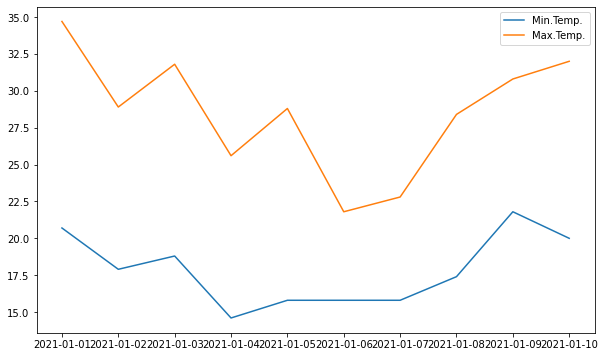

In [ ]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# 중요! 아래와 같이 코드 작성
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6)) # 제일 중요한 라인(Matplotlib 아키텍트 전체를 사용 가능한 수식)
ax.plot(dates, min_temperature, label = "Min.Temp.")
ax.plot(dates, max_temperature, label = "Max.Temp.")

ax.legend()
plt.show()

주식 데이터 불러오기

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 9.2 MB/s 
     |████████████████████████████████| 63 kB 41.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
data = yf.download("AAPL", start = "2019-08-01", end = "2022-03-23")
ts = data['Open']
print(ts.head())
type(ts)

[*********************100%***********************]  1 of 1 completed
Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


pandas.core.series.Series

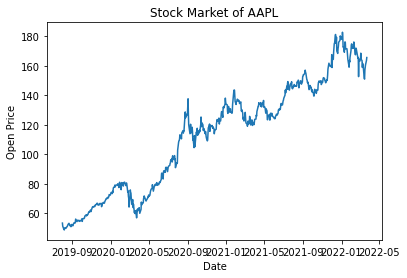

In [ ]:
# pyplot 형태로 그리기
import matplotlib.pyplot as plt
plt.plot(ts)
plt.title("Stock Market of AAPL")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

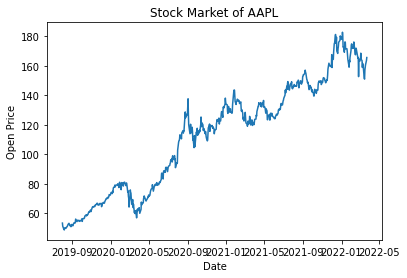

In [ ]:
# 객체 지향으로 그리기
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # 겉에 네모나게 표시만 됨. 10, 10
ax.plot(ts)
ax.set_title("Stock Market of AAPL")
ax.set_xlabel("Date")
ax.set_ylabel("Open Price")
plt.show()

barplots : <BarContainer object of 12 artists>
Rectangle(xy=(0.6, 0), width=0.8, height=300, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=400, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=550, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=900, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=600, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=960, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=900, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=910, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=800, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=700, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=550, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=450, angle=0)


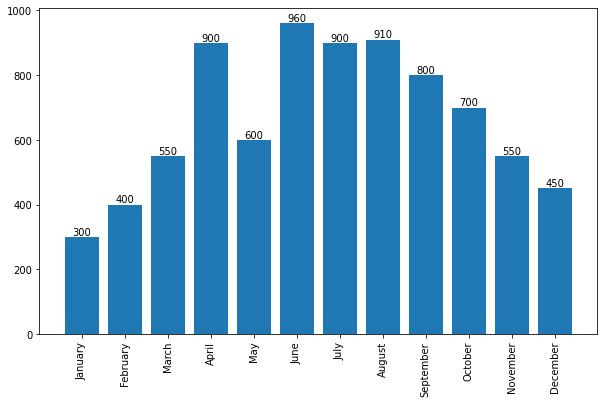

In [ ]:
# 막대 그래프

import matplotlib.pyplot as plt
import numpy as np
import calendar #날짜

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

flg, ax = plt.subplots(figsize = (10, 6))
barplots = ax.bar(month_list, sold_list)


print("barplots :", barplots)

for plot in barplots:
  print(plot)
  # print(plot.get_height())
  # print(plot.get_x())
  # print(plot.get_y())
  # print(plot.get_width())
  height = plot.get_height()
  ax.text(plot.get_x() + plot.get_width()/2., height, height, ha = 'center', va = 'bottom')

plt.xticks(month_list, calendar.month_name[1:13], rotation = 90)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


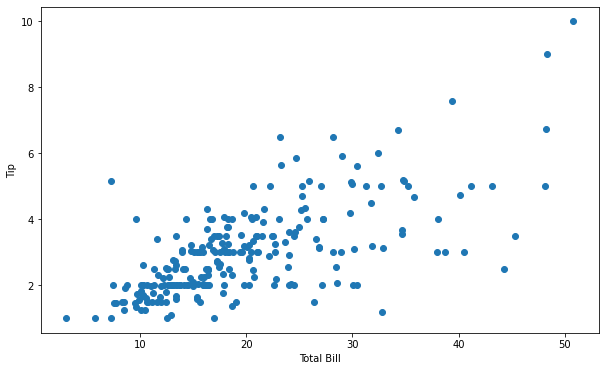

In [ ]:
import seaborn as sns

tips = sns.load_dataset("tips")
print(tips.info())
x = tips['total_bill']
y = tips['tip']

#산점도
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x, y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

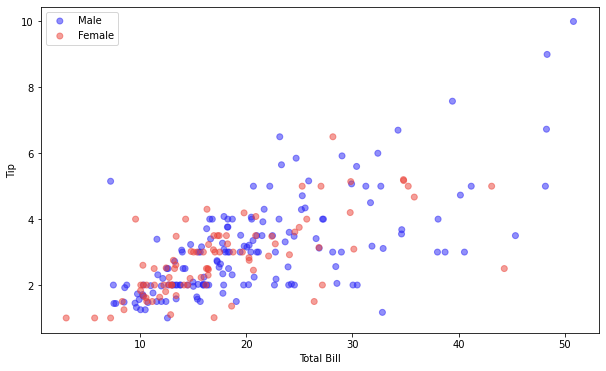

In [ ]:
# 예쁘게 꾸밀 때 쓰는 그래프 수식.

label, data = tips.groupby('sex')
# print(label)
# print(data)

tips['sex_color'] = tips['sex'].map({'Male': '#2521F6', 'Female': '#EB4036'}) # 색상 추가 수식.
# print(tips.head())

fig, ax = plt.subplots(figsize=(10, 6))
for label, data in tips.groupby('sex'):
  ax.scatter(data['total_bill'], data['tip'], label = label, color = data['sex_color'], alpha = 0.5)
  ax.set_xlabel('Total Bill')
  ax.set_ylabel('Tip')

ax.legend() # 범례
plt.show()

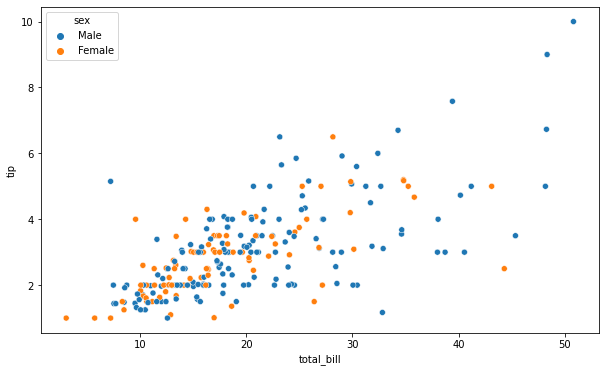

In [ ]:
# 간단하게 나타낼 때 쓰는 그래프 수식.

import matplotlib.pyplot as plt
import seaborn as sns

tips =sns.load_dataset("tips")

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)
plt.show()

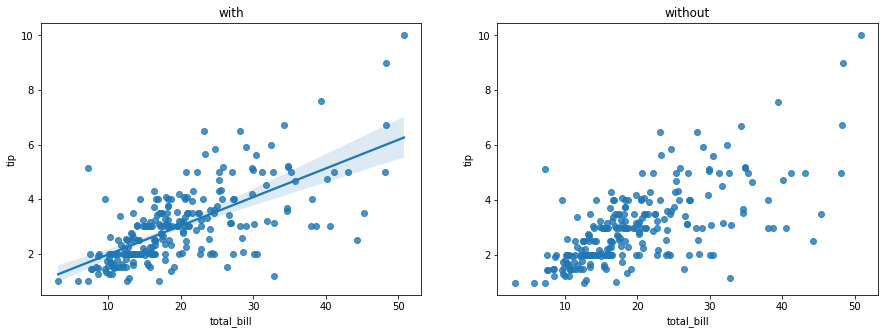

In [ ]:
# 두개의 그래프를 동시에 표현

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 첫 번째 그래프 수식. ax[0]

sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax[0], fit_reg = True)
ax[0].set_title("with")

#두 번째 그래프 수식. ax[1]
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax[1], fit_reg = False)
ax[1].set_title("without") #ax[] 안에 숫자는 앞에 수식의 숫자에 맞춰서 적어서 타이틀을 지정한다.

plt.show()

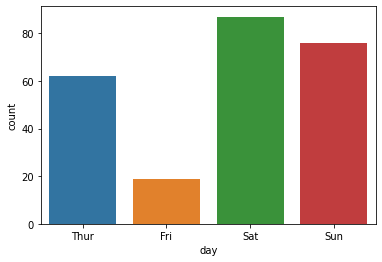

In [ ]:
# 막대 그래프 그리기 seaborn 방식

sns.countplot(x = "day", data = tips)
plt.show()

In [ ]:
print(tips['day'].value_counts().index)
print(tips['day'].value_counts().values)
print(tips['day'].value_counts(ascending=True))


CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
[87 76 62 19]
Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64


Rectangle(xy=(-0.4, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=76, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=19, angle=0)


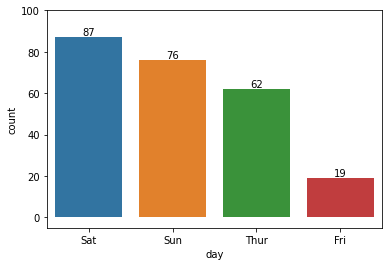

In [ ]:
# 내림차순
fig, ax = plt.subplots()
ax = sns.countplot(x = "day", data = tips, order = tips['day'].value_counts().index)

for plot in ax.patches: # 5 ~ 6 까지는 matplotlib 가 쓰임. -> 숫자 표시 수식의 시작.
  print(plot)
  height = plot.get_height()
  ax.text(plot.get_x() + plot.get_width()/2., height, height, ha = 'center', va = 'bottom')

ax.set_ylim(-5, 100)
plt.show()

어려운 시각화 그래프

17.68
17.15
20.44
21.41
Text(0, 0, 'Thur')
Text(0, 0, 'Fri')
Text(0, 0, 'Sat')
Text(0, 0, 'Sun')


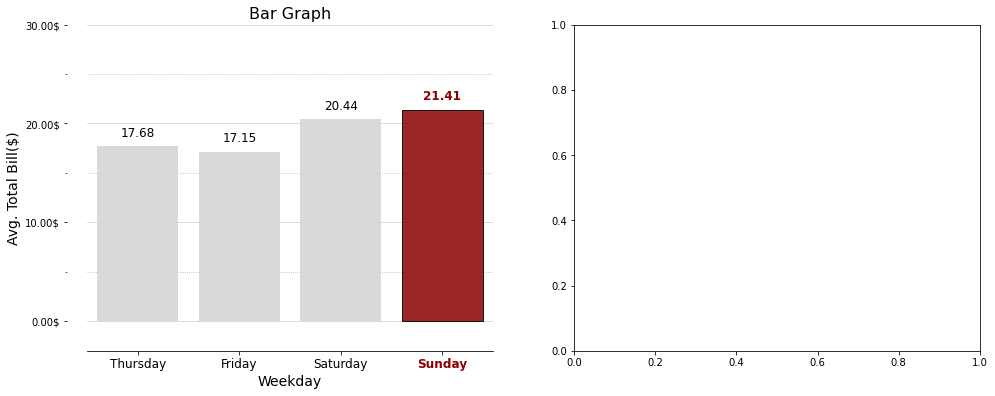

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)

def major_formatter(x, pos):
  return "%.2f$" % x

formatter = FuncFormatter(major_formatter)

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax0 = sns.barplot(x = "day", y = "total_bill", data = tips, 
                  ci = None, color = 'lightgray', alpha = 0.85, zorder=2, 
                  ax = ax[0])

# groupby 
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)

h_day = group_mean.sort_values(ascending=False).index[0]
# print(h_day)
h_mean = group_mean.sort_values(ascending=False).values[0]
# print(h_mean)

# text 추가
for plot in ax0.patches:
  height = np.round(plot.get_height(), 2)
  print(height)
  
  # Default
  fontweight = "normal"
  color = "k"
  if h_mean == height:
    fontweight = "bold"
    color = "darkred"
    plot.set_facecolor(color)
    plot.set_edgecolor("black")

  ax0.text(plot.get_x() + plot.get_width()/2., 
           height + 1, height, 
           ha = 'center', size = 12, fontweight = fontweight, color = color)


# 축 수정
ax0.set_ylim(-3, 30)
ax0.set_title("Bar Graph", size=16)

# spines 제거
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color = "lightgray")
ax0.grid(axis="y", which="minor", ls = ":")

ax0.set_xlabel("Weekday", fontsize=14)

for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")

ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size = 12)

plt.show()